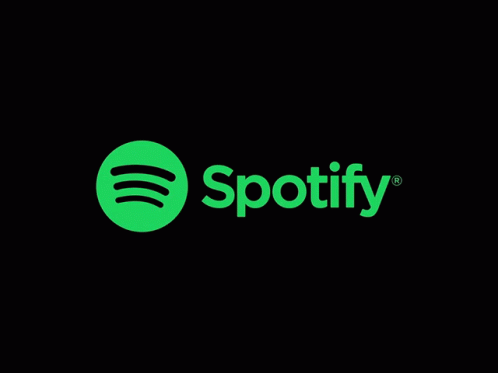

## **`Music Recommender System`**
# 
> This project aims to develop a music recommender system using a dataset of 
> Spotify songs. The system will recommend similar songs based on the lyrics' 
> content using natural language processing (NLP) techniques and cosine similarity.
> STUDENT ID: CA/JL3/14772

#### 📚 **`Import Libraries and Load Dataset`**

>We will start by importing the necessary libraries for data manipulation, visualization, and NLP. After that, we will load the dataset `spotify_millsongdata.csv` into a pandas DataFrame to inspect its structure and understand the initial data.


In [2]:
import nltk
import numpy as np
import pandas as pd
import seaborn as sns
nltk.download('punkt')
import matplotlib.pyplot as plt
from nltk.stem.porter import PorterStemmer


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kakak\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [73]:
data = pd.read_csv('spotify_millsongdata.csv')
data.head()

,artist,song,link,text
0,ABBA,Ahe's My Kind Of Girl,/a/abba/ahes+my+kind+of+girl_20598417.html,"Look at her face, it's a wonderful face \r\nA..."
1,ABBA,"Andante, Andante",/a/abba/andante+andante_20002708.html,"Take it easy with me, please \r\nTouch me gen..."
2,ABBA,As Good As New,/a/abba/as+good+as+new_20003033.html,I'll never know why I had to go \r\nWhy I had...
3,ABBA,Bang,/a/abba/bang_20598415.html,Making somebody happy is a question of give an...
4,ABBA,Bang-A-Boomerang,/a/abba/bang+a+boomerang_20002668.html,Making somebody happy is a question of give an...


In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57650 entries, 0 to 57649
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   artist  57650 non-null  object
 1   song    57650 non-null  object
 2   link    57650 non-null  object
 3   text    57650 non-null  object
dtypes: object(4)
memory usage: 1.8+ MB


#### 🗑️ **`Data Cleaning and Preparation`**

>In this section, we will clean the data by dropping unnecessary columns and checking for missing values. Additionally, we will sample a subset of the data to make computations more manageable. This step is essential to ensure that the data is in a suitable format for further analysis.


In [75]:
data.drop(columns='link',inplace=True)
data.head()

,artist,song,text
0,ABBA,Ahe's My Kind Of Girl,"Look at her face, it's a wonderful face \r\nA..."
1,ABBA,"Andante, Andante","Take it easy with me, please \r\nTouch me gen..."
2,ABBA,As Good As New,I'll never know why I had to go \r\nWhy I had...
3,ABBA,Bang,Making somebody happy is a question of give an...
4,ABBA,Bang-A-Boomerang,Making somebody happy is a question of give an...


In [76]:
print(f'Num Of Row: {data.shape[0]}')
print(f'Num Of Columns: {data.shape[1]}')

Num Of Row: 57650
Num Of Columns: 3


In [77]:
data = data.sample(10000).reset_index(drop=True)

In [78]:
print(f'Num Of Row: {data.shape[0]}')
print(f'Num Of Columns: {data.shape[1]}')

Num Of Row: 10000
Num Of Columns: 3


In [79]:
data.isna().sum()

artist    0
song      0
text      0
dtype: int64

In [80]:
data.head()

,artist,song,text
0,Evanescence,Anything For You,I'd give anything to give me to you \r\nCan y...
1,Train,Brick By Brick,The dust has finally settled down \r\nThe sun...
2,Van Halen,Big Fat Money,Some say money is bad for the soul \r\nBad fo...
3,Iggy Pop,Lowdown,I don't want to throw away my time \r\nPlayin...
4,Metallica,Green Hell,Originally performed by The Misfits \r\nHere ...


#### 🛠️ **`Text Preprocessing`**

>Text preprocessing is a crucial step in NLP. We will convert the text to lowercase, remove special characters and newlines, and apply stemming. These steps help in standardizing the text data, which is essential for achieving better results in subsequent text analysis.


In [81]:
data['text'][0]

"I'd give anything to give me to you  \r\nCan you forget the world that you thought you knew?  \r\n  \r\nIf you want me  \r\nCome and find me (I'm here for you)  \r\nNothing's stopping you  \r\nSo please release me  \r\n  \r\n[Chorus]  \r\nI'll believe all your lies  \r\nJust pretend you love me  \r\nMake believe, close your eyes  \r\nI'll be anything for you  \r\n  \r\nNothing left to make me feel anymore  \r\nThere's only you and everyday I need more  \r\n  \r\n(If you want me) If you want me  \r\n(Come and find me) Come and find me  \r\n(Anything you want me to be) I'll do anything (anything) you say  \r\n(For you) Just tell me  \r\n  \r\n[Chorus]  \r\n  \r\n[Chorus]  \r\n  \r\nAnything for you  \r\n  \r\nI'll become your earth and sky  \r\nForever never die  \r\nI'll be everything you need  \r\n  \r\n[Chorus]  \r\n  \r\n[Chorus]\r\n\r\n"

In [82]:
data['text'] = data['text'].str.lower().replace(r'^\w\s', ' ').replace(r'\n', ' ', regex = True)

In [83]:
data['text'][0]

"i'd give anything to give me to you  \r can you forget the world that you thought you knew?  \r   \r if you want me  \r come and find me (i'm here for you)  \r nothing's stopping you  \r so please release me  \r   \r [chorus]  \r i'll believe all your lies  \r just pretend you love me  \r make believe, close your eyes  \r i'll be anything for you  \r   \r nothing left to make me feel anymore  \r there's only you and everyday i need more  \r   \r (if you want me) if you want me  \r (come and find me) come and find me  \r (anything you want me to be) i'll do anything (anything) you say  \r (for you) just tell me  \r   \r [chorus]  \r   \r [chorus]  \r   \r anything for you  \r   \r i'll become your earth and sky  \r forever never die  \r i'll be everything you need  \r   \r [chorus]  \r   \r [chorus]\r \r "

In [84]:
stemmer = PorterStemmer()

data['text'] = data['text'].apply(lambda x: ' '.join([stemmer.stem(word) for word in x.split()]))

In [85]:
data.text[0]

"i'd give anyth to give me to you can you forget the world that you thought you knew? if you want me come and find me (i'm here for you) nothing' stop you so pleas releas me [chorus] i'll believ all your lie just pretend you love me make believe, close your eye i'll be anyth for you noth left to make me feel anymor there' onli you and everyday i need more (if you want me) if you want me (come and find me) come and find me (anyth you want me to be) i'll do anyth (anything) you say (for you) just tell me [chorus] [chorus] anyth for you i'll becom your earth and sky forev never die i'll be everyth you need [chorus] [chorus]"

#### 📊 **`TF-IDF Vectorization and Cosine Similarity`**

>We will use TF-IDF (Term Frequency-Inverse Document Frequency) to convert the text data into numerical features, which helps in representing the importance of a word in a document relative to a collection of documents. Then, we will compute cosine similarity to measure the similarity between song lyrics based on their TF-IDF vectors.



In [86]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [87]:
tfid = TfidfVectorizer(analyzer='word',stop_words='english')

In [88]:
matrix = tfid.fit_transform(data['text'])

In [89]:
cos_similer = cosine_similarity(matrix)
cos_similer

array([[1.        , 0.05123246, 0.05480843, ..., 0.00819593, 0.00903645,
        0.0533939 ],
       [0.05123246, 1.        , 0.00541762, ..., 0.00729985, 0.04343347,
        0.07736288],
       [0.05480843, 0.00541762, 1.        , ..., 0.00736792, 0.01155558,
        0.00835701],
       ...,
       [0.00819593, 0.00729985, 0.00736792, ..., 1.        , 0.00563833,
        0.05296614],
       [0.00903645, 0.04343347, 0.01155558, ..., 0.00563833, 1.        ,
        0.00617616],
       [0.0533939 , 0.07736288, 0.00835701, ..., 0.05296614, 0.00617616,
        1.        ]])

In [91]:
data.head()

,artist,song,text
0,Evanescence,Anything For You,i'd give anyth to give me to you can you forge...
1,Train,Brick By Brick,the dust ha final settl down the sun is shine ...
2,Van Halen,Big Fat Money,some say money is bad for the soul bad for the...
3,Iggy Pop,Lowdown,i don't want to throw away my time play game i...
4,Metallica,Green Hell,origin perform by the misfit here in thi place...


In [92]:
data[data['song']=='Brick By Brick'].index[0]

1

#### 💡 **`Building the Recommendation System`**

>In this section, we will build the recommendation system. The system will take a song name as input and return a list of recommended songs based on the cosine similarity of their lyrics.


In [2]:
def recommender(song_name):
    idx = data[data['song']==song_name].index[0]
    distance = sorted(list(enumerate(cos_similer[idx])),reverse=True,key=lambda x:x[1])
    rec_song = []
    for song_id in distance[1:6]:
        rec_song.append(data.iloc[song_id[0]].song)
    return rec_song

In [3]:
recommender('Lowdown')

['Scentless Apprentice (Rehearsal)',
 'Kick A Hole In The Sky',
 'Hole In My Heart',
 'Low Life',
 'Heart Of Hearts']

#### 💾 **`Saving the Model and Data`**
# 
>Finally, we will save the cosine similarity matrix and the dataset using the `pickle` module. This will allow us to reuse these objects without recalculating them each time.


In [98]:
import pickle
pickle.dump(cos_similer,open('similarity.pkl','wb'))
pickle.dump(data,open('data.pkl','wb'))